In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
bernanke_a = pd.read_csv('bernanke_group_A.csv')  
bernanke_ab = pd.read_csv('bernanke_group_AB.csv')  
yellen_a = pd.read_csv('yellen_group_A.csv')  
yellen_ab = pd.read_csv('yellen_group_AB.csv')  

In [3]:
bernanke_a.head()

,GOID,Title,Numeric Date,Text,sentContainInfo
0,851940715,Man of the year 2010 [ET Cetera],2011-01-05,"Normally, I look around every part of earth fo...",The award may be given to Ben Bernanke for pr...
1,758587644,Bernanke backs qualitative easing,2010-10-16,US Federal Reserve chairman Ben Bernanke said ...,US Federal Reserve chairman Ben Bernanke said ...
2,2201181439,MARKET TALK: Hungary Bonds Hardly Move After I...,2009-10-19,Contact us in London. +44-20-7842-9464Marketta...,"Looking ahead, earnings reports continue this..."
3,434269355,"The Daily Dummies: Warning, satirical content ...",2008-11-13,Separation of church and fate In a speech to...,"And God is my successor, Ben Bernanke"
4,1400908809,Mortgage rates fall on lessening concerns abou...,2013-01-01,U.S. Federal Reserve chairman Ben Bernanke's r...,Federal Reserve chairman Ben Bernanke's recen...


In [4]:
bernanke_a = bernanke_a[bernanke_a['sentContainInfo'].notna()]
bernanke_a['sent_count'] = bernanke_a['sentContainInfo'].apply(lambda x: len(x.split('.')))

bernanke_ab = bernanke_ab[bernanke_ab['sentContainInfo'].notna()]
bernanke_ab['sent_count'] = bernanke_ab['sentContainInfo'].apply(lambda x: len(x.split('.')))

yellen_a = yellen_a[yellen_a['sentContainInfo'].notna()]
yellen_a['sent_count'] = yellen_a['sentContainInfo'].apply(lambda x: len(x.split('.')))

yellen_ab = yellen_ab[yellen_ab['sentContainInfo'].notna()]
yellen_ab['sent_count'] = yellen_ab['sentContainInfo'].apply(lambda x: len(x.split('.')))

In [229]:
bernanke_a.sort_values('Numeric Date').drop(['Text'], axis=1).to_csv('plots/raw_csv/bernanke_a.csv',index=False)
bernanke_ab.sort_values('Numeric Date').drop(['Text'], axis=1).to_csv('plots/raw_csv/bernanke_ab.csv',index=False)
yellen_a.sort_values('Numeric Date').drop(['Text'], axis=1).to_csv('plots/raw_csv/yellen_a.csv',index=False)
yellen_ab.sort_values('Numeric Date').drop(['Text'], axis=1).to_csv('plots/raw_csv/yellen_ab.csv',index=False)

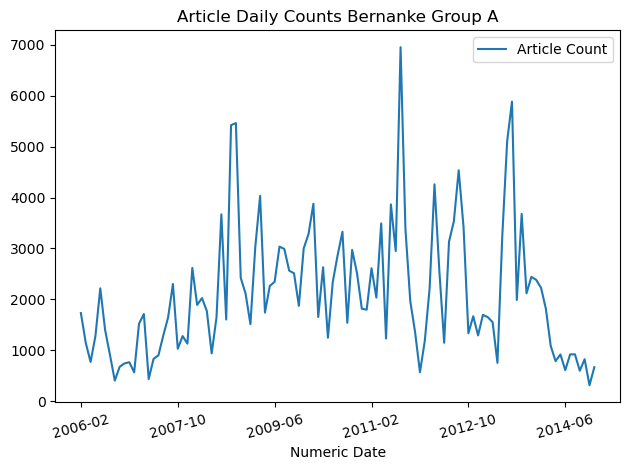

In [13]:
bernanke_a['Numeric Date By Months'] = pd.to_datetime(bernanke_a['Numeric Date'], format='%Y/%m/%d').apply(lambda x: x.strftime('%Y-%m'))
bernanke_a.groupby(['Numeric Date']).agg(count_col=pd.NamedAgg(column="GOID", aggfunc="count")).reset_index().rename(columns={"count_col": "Article Count"})\
.plot.line(x='Numeric Date', y='Article Count', title='Article Daily Counts Bernanke Group A',rot=15)
plt.tight_layout()
plt.savefig('plots/article_level/daily/Bernanke Group A Article Daily Count.PNG')

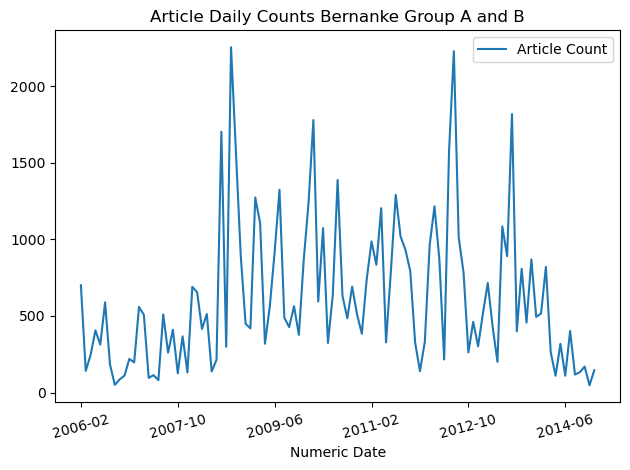

In [14]:
bernanke_ab['Numeric Date By Months'] = pd.to_datetime(bernanke_ab['Numeric Date'], format='%Y/%m/%d').apply(lambda x: x.strftime('%Y-%m'))
bernanke_ab.groupby(['Numeric Date']).agg(count_col=pd.NamedAgg(column="GOID", aggfunc="count")).reset_index().rename(columns={"count_col": "Article Count"})\
.plot.line(x='Numeric Date', y='Article Count', title='Article Daily Counts Bernanke Group A and B',rot=15)
plt.tight_layout()
plt.savefig('plots/article_level/daily/Bernanke Group A and B Article Daily Count.PNG')

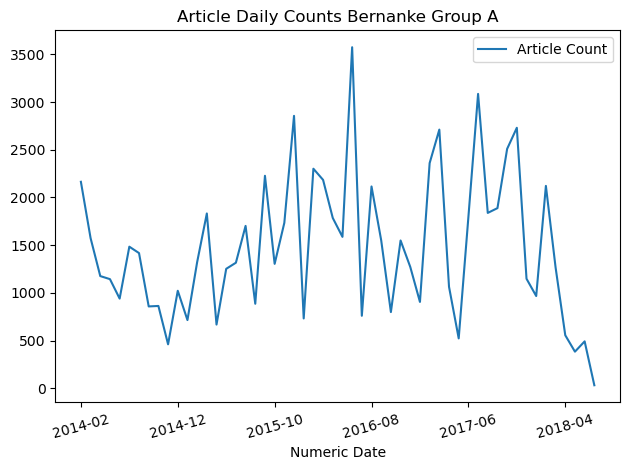

In [16]:
yellen_a['Numeric Date By Months'] = pd.to_datetime(yellen_a['Numeric Date'], format='%Y/%m/%d').apply(lambda x: x.strftime('%Y-%m'))
yellen_a.groupby(['Numeric Date']).agg(count_col=pd.NamedAgg(column="GOID", aggfunc="count")).reset_index().rename(columns={"count_col": "Article Count"})\
.plot.line(x='Numeric Date', y='Article Count', title='Article Daily Counts Bernanke Group A',rot=15)
plt.tight_layout()
plt.savefig('plots/article_level/daily/Yellen Group A Article Daily Count.PNG')

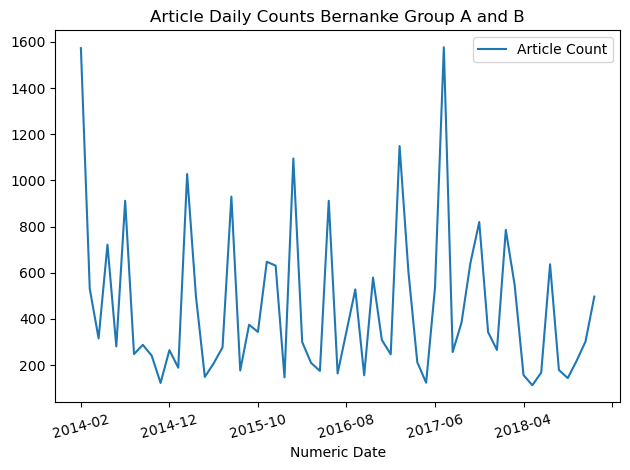

In [15]:
yellen_ab['Numeric Date By Months'] = pd.to_datetime(yellen_ab['Numeric Date'], format='%Y/%m/%d').apply(lambda x: x.strftime('%Y-%m'))
yellen_ab.groupby(['Numeric Date']).agg(count_col=pd.NamedAgg(column="GOID", aggfunc="count")).reset_index().rename(columns={"count_col": "Article Count"})\
.plot.line(x='Numeric Date', y='Article Count', title='Article Daily Counts Bernanke Group A and B',rot=15)
plt.tight_layout()
plt.savefig('plots/article_level/daily/Yellen Group A and B Article Daily Count.PNG')

In [11]:
yellen_a['Numeric Date'] = pd.to_datetime(yellen_a['Numeric Date'], format='%Y/%m/%d').apply(lambda x: x.strftime('%Y-%m'))
yellen_a = yellen_a.sort_values('Numeric Date')

yellen_ab['Numeric Date'] = pd.to_datetime(yellen_ab['Numeric Date'], format='%Y/%m/%d').apply(lambda x: x.strftime('%Y-%m'))
yellen_ab = yellen_ab.sort_values('Numeric Date')

bernanke_a['Numeric Date'] = pd.to_datetime(bernanke_a['Numeric Date'], format='%Y/%m/%d').apply(lambda x: x.strftime('%Y-%m'))
bernanke_a = bernanke_a.sort_values('Numeric Date')

bernanke_ab['Numeric Date'] = pd.to_datetime(bernanke_ab['Numeric Date'], format='%Y/%m/%d').apply(lambda x: x.strftime('%Y-%m'))
bernanke_ab = bernanke_ab.sort_values('Numeric Date')

In [204]:
# yellen_a['Numeric Date'] = pd.to_datetime(yellen_a['Numeric Date'].astype(str), format='%Y/%m/%d').apply(lambda x: x.strftime('%b %Y')).dt.strftime('%Y-%m')
# yellen_ab['Numeric Date'] = pd.to_datetime(yellen_ab['Numeric Date'].astype(str), format='%Y/%m/%d').apply(lambda x: x.strftime('%b %Y')).dt.strftime('%Y-%m')

# bernanke_a['Numeric Date'] = pd.to_datetime(bernanke_a['Numeric Date'].astype(str), format='%Y/%m/%d').apply(lambda x: x.strftime('%b %Y')).dt.strftime('%Y-%m')
# bernanke_ab['Numeric Date'] = pd.to_datetime(bernanke_ab['Numeric Date'].astype(str), format='%Y/%m/%d').apply(lambda x: x.strftime('%b %Y')).dt.strftime('%Y-%m')


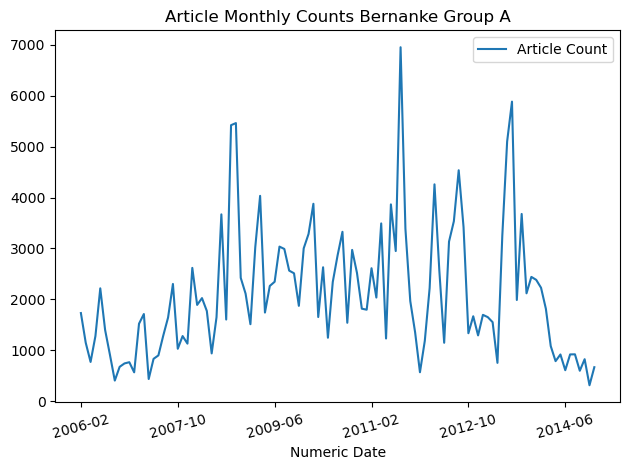

In [18]:
bernanke_a.groupby(['Numeric Date']).agg(count_col=pd.NamedAgg(column="GOID", aggfunc="count")).reset_index().rename(columns={"count_col": "Article Count"})\
.plot.line(x='Numeric Date', y='Article Count', title='Article Monthly Counts Bernanke Group A',rot=15)
plt.tight_layout()
plt.savefig('plots/article_level/monthly/Bernanke Group A Article Monthly Count.PNG')

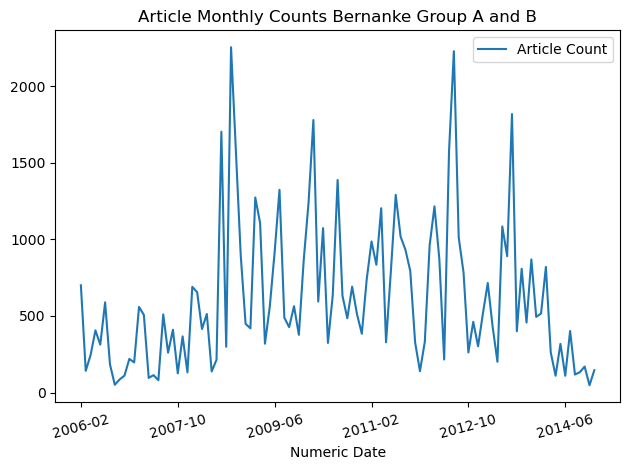

In [19]:
bernanke_ab.groupby(['Numeric Date']).agg(count_col=pd.NamedAgg(column="GOID", aggfunc="count")).reset_index().rename(columns={"count_col": "Article Count"})\
.plot.line(x='Numeric Date', y='Article Count', title='Article Monthly Counts Bernanke Group A and B',rot=15)
plt.tight_layout()
plt.savefig('plots/article_level/monthly/Bernanke Group A and B Article Monthly Count.PNG')

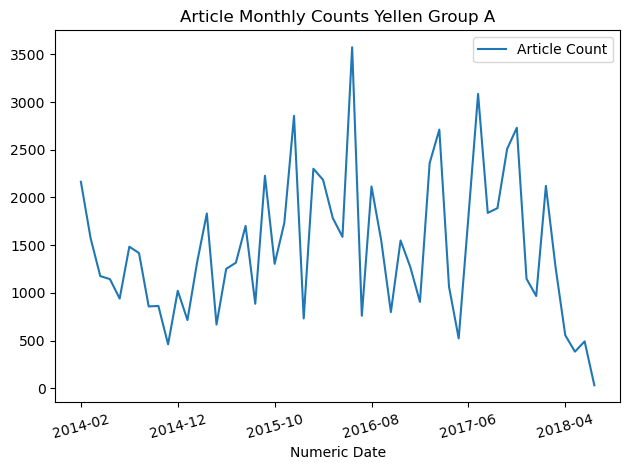

In [20]:
yellen_a.groupby(['Numeric Date']).agg(count_col=pd.NamedAgg(column="GOID", aggfunc="count")).reset_index().rename(columns={"count_col": "Article Count"})\
.plot.line(x='Numeric Date', y='Article Count', title='Article Monthly Counts Yellen Group A',rot=15)
plt.tight_layout()
plt.savefig('plots/article_level/monthly/Yellen Group A Article Monthly Count.PNG')

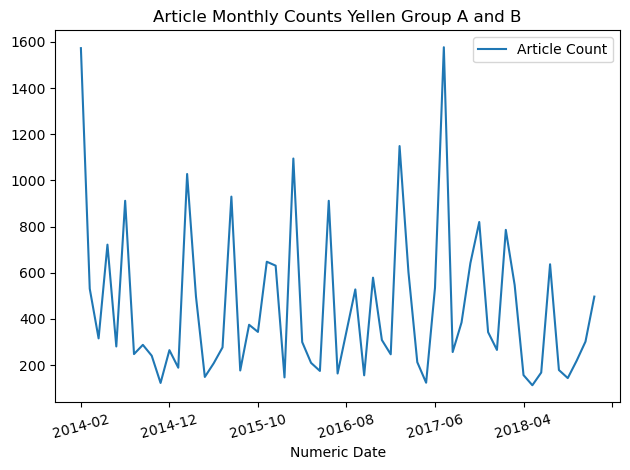

In [21]:
yellen_ab.groupby(['Numeric Date']).agg(count_col=pd.NamedAgg(column="GOID", aggfunc="count")).reset_index().rename(columns={"count_col": "Article Count"})\
.plot.line(x='Numeric Date', y='Article Count', title='Article Monthly Counts Yellen Group A and B',rot=15)
plt.tight_layout()
plt.savefig('plots/article_level/monthly/Yellen Group A and B Article Monthly Count.PNG')

In [217]:
bernanke_a_uni_goid = len(bernanke_a['GOID'].unique())
bernanke_ab_uni_goid = len(bernanke_ab['GOID'].unique())
yellen_a_uni_goid = len(yellen_a['GOID'].unique())
yellen_ab_uni_goid = len(yellen_ab['GOID'].unique())

In [219]:
d = {'Yellen_Group_A': [yellen_a_uni_goid], 'Yellen_Group_AB': [yellen_ab_uni_goid], \
     'Bernanke_Group_A': [bernanke_a_uni_goid], 'Bernanke_Group_AB': [bernanke_ab_uni_goid]}
df = pd.DataFrame(data=d)

In [221]:
df.to_csv('plots/GOID_unique_count.csv',index=False)

In [56]:
bernanke_a[bernanke_a['sentContainInfo'].isnull()]

,GOID,Title,Numeric Date,Text,sentContainInfo,sent_count
79,1370403744,The Recap: Bernanke is clear that stimulus wil...,2013-01-01,"Business Apple received between 4,000 and 5,00...",NaN,NaN
450,2731081182,Jobless,2009-07-06,Link to Audio,NaN,NaN
838,2569667773,Greenspan throws a party The Fed chairman's in...,2011-08-01,The Fed raised interest rates by a quarter of ...,NaN,NaN
997,858315876,Chairman Ben S. Bernanke Speaks at the Indepen...,2011-03-23,The chairman of the Federal Reserve issued the...,NaN,NaN
1375,1434876830,"Uncertainty about Fed, fiscal policy weighs on...",2013-09-23,NEW YORK -- U.S. stocks fell on Monday after n...,NaN,NaN
...,...,...,...,...,...,...
225311,1493918710,New Fed chief Janet Yellen lets a long career ...,2014-01-01,When Janet Yellen takes over the reins of the ...,NaN,NaN
225317,1458594587,New Fed chair sticks to her QE guns,2013-11-15,"Janet Yellen, the incoming chair of the Federa...",NaN,NaN
225395,1470001214,"Obama's picks for Homeland, IRS confirmed",2013-12-21,"In its last workday of the year, the Democrat...",NaN,NaN
226220,2085824294,Live Blog: Fed Policy Decision and Bernanke Pr...,2013-12-18,It's the most momentous Fed decision since the...,NaN,NaN


In [22]:
conda install -c conda-forge sentence-transformers

Solving environment: - 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistenc\ 

  - conda-forge/linux-64::pulseaudio==14.0=h0d2025b_11
  - conda-forge/linux-64::qt-main==5.15.6=hd477bba_1
  - conda-forge/linux-64::matplotlib==3.6.2=py310hff52083_0
  - conda-forge/linux-64::libudev1==252=h166bdaf_0
  - conda-forge/linux-64::pyqt==5.15.7=py310h29803b5_2
done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.4
  latest version: 22.11.1

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/ec2-user/SageMaker/.conda/envs/textblob

  added / updated specs:
    - sentence-transformers


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    aom-3.5.0                  |       h27087fc_0         2.7 MB  conda-forge
    ffmpeg-4.4.2 

libva-2.17.0         | 183 KB    | ##################################### | 100% 
x264-1!164.3095      | 877 KB    | ##################################### | 100% 
pytorch-1.12.1       | 62.3 MB   | ##################################### | 100% 
svt-av1-1.4.1        | 2.4 MB    | ##################################### | 100% 
nltk-3.8             | 1.0 MB    | ##################################### | 100% 
libpciaccess-0.17    | 39 KB     | ##################################### | 100% 
regex-2022.10.31     | 396 KB    | ##################################### | 100% 
scikit-learn-1.2.0   | 7.2 MB    | ##################################### | 100% 
openh264-2.3.1       | 1.5 MB    | ##################################### | 100% 
filelock-3.8.2       | 14 KB     | ##################################### | 100% 
importlib_metadata-5 | 9 KB      | ##################################### | 100% 
libdrm-2.4.114       | 298 KB    | ##################################### | 100% 
tokenizers-0.13.1    | 4.5 M

In [1]:
from sentence_transformers import SentenceTransformer

#there are about 10 pretrained models
#roberta-large-nli-stsb-mean-tokens - returns 1024 dimentional vector
#distilbert-base-nli-stsb-mean-tokens - returns 768 dimentional vector

PRETRAINED_MODEL='roberta-large-nli-stsb-mean-tokens'    # 'distilbert-base-nli-stsb-mean-tokens'        
model = SentenceTransformer(PRETRAINED_MODEL)  

ConnectionError: HTTPSConnectionPool(host='huggingface.co', port=443): Max retries exceeded with url: /api/models/sentence-transformers/roberta-large-nli-stsb-mean-tokens (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7f6c09510730>: Failed to establish a new connection: [Errno 101] Network is unreachable'))